In [1]:
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
import os 
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

import keras

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils

Using TensorFlow backend.


Exception: URL fetch failure on https://s3.amazonaws.com/img-datasets/mnist.pkl.gz : None -- [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1076)

cd "/Applications/Python 3.6/"  
sudo "./Install Certificates.command"

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train:", X_train.shape, "y_train:", y_train.shape)
print("X_test :", X_test.shape, "y_test :", y_test.shape)

X_train: (60000, 28, 28) y_train: (60000,)
X_test : (10000, 28, 28) y_test : (10000,)


In [3]:
num_rows = 28
num_cols = 28
num_channels = 1
num_classes = 10

X_train = X_train.reshape(X_train.shape[0], num_rows, num_cols, num_channels).astype(np.float32) / 255
X_test = X_test.reshape(X_test.shape[0], num_rows, num_cols, num_channels).astype(np.float32) / 255

print("X_train:", X_train.shape, "X_test:", X_test.shape)

X_train: (60000, 28, 28, 1) X_test: (10000, 28, 28, 1)


In [4]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

print("y_train:", y_train.shape, "y_test:", y_test.shape)

y_train: (60000, 10) y_test: (10000, 10)


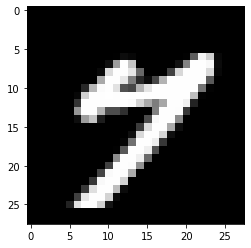

Label: 7


In [5]:
im = X_train[1001,:,:,0]
plt.imshow(im,cmap='gray')
plt.show()

print('Label:',np.nonzero(y_train[1001,:])[0][0])

In [6]:
model = Sequential()

model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (1, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

W0828 15:36:46.395761 4514215360 deprecation_wrapper.py:119] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0828 15:36:46.412540 4514215360 deprecation_wrapper.py:119] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0828 15:36:46.414906 4514215360 deprecation_wrapper.py:119] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0828 15:36:46.430002 4514215360 deprecation_wrapper.py:119] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:42

In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 5, 128)        

In [8]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

W0828 15:36:46.659018 4514215360 deprecation.py:323] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 19s - loss: 0.6048 - acc: 0.8011 - val_loss: 0.1393 - val_acc: 0.9592
Epoch 2/10
 - 18s - loss: 0.1838 - acc: 0.9417 - val_loss: 0.0836 - val_acc: 0.9762
Epoch 3/10
 - 19s - loss: 0.1341 - acc: 0.9574 - val_loss: 0.0621 - val_acc: 0.9819
Epoch 4/10
 - 19s - loss: 0.1078 - acc: 0.9656 - val_loss: 0.0547 - val_acc: 0.9831
Epoch 5/10
 - 18s - loss: 0.0928 - acc: 0.9712 - val_loss: 0.0429 - val_acc: 0.9867
Epoch 6/10
 - 19s - loss: 0.0808 - acc: 0.9741 - val_loss: 0.0371 - val_acc: 0.9878
Epoch 7/10
 - 18s - loss: 0.0751 - acc: 0.9759 - val_loss: 0.0399 - val_acc: 0.9882
Epoch 8/10
 - 19s - loss: 0.0693 - acc: 0.9778 - val_loss: 0.0313 - val_acc: 0.9907
Epoch 9/10
 - 20s - loss: 0.0647 - acc: 0.9797 - val_loss: 0.0322 - val_acc: 0.9904
Epoch 10/10
 - 19s - loss: 0.0608 - acc: 0.9809 - val_loss: 0.0341 - val_acc: 0.9893


Remove Dropout for inference

In [9]:
for k in model.layers:
    if type(k) is keras.layers.Dropout:
        model.layers.remove(k)

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 5, 128)        

In [11]:
# Save the model
model.save('mnistCNN.h5')

In [12]:
import coremltools

output_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
scale = 1/255.
coreml_model = coremltools.converters.keras.convert('./mnistCNN.h5',
                                                   input_names='image',
                                                   image_input_names='image',
                                                   output_names='output',
                                                   class_labels=output_labels,
                                                   image_scale=scale)

coreml_model.author = 'Sri Raghu Malireddi'
coreml_model.license = 'MIT'
coreml_model.short_description = 'Model to classify hand written digit'

coreml_model.input_description['image'] = 'Grayscale image of hand written digit'
coreml_model.output_description['output'] = 'Predicted digit'

coreml_model.save('mnistCNN.mlmodel')

W0828 15:39:55.019219 4514215360 __init__.py:71] TensorFlow version 1.14.0 detected. Last version known to be fully compatible is 1.13.1 .
W0828 15:39:55.020218 4514215360 __init__.py:117] Keras version 2.2.5 detected. Last version known to be fully compatible of Keras is 2.2.4 .


0 : conv2d_1_input, <keras.engine.input_layer.InputLayer object at 0x14b7d7bd0>
1 : conv2d_1, <keras.layers.convolutional.Conv2D object at 0x14b7d7950>
2 : conv2d_1__activation__, <keras.layers.core.Activation object at 0x14b5b2650>
3 : max_pooling2d_1, <keras.layers.pooling.MaxPooling2D object at 0x14b7df290>
4 : conv2d_2, <keras.layers.convolutional.Conv2D object at 0x14b7f2d50>
5 : conv2d_2__activation__, <keras.layers.core.Activation object at 0x14b998b50>
6 : max_pooling2d_2, <keras.layers.pooling.MaxPooling2D object at 0x14b7f2850>
7 : conv2d_3, <keras.layers.convolutional.Conv2D object at 0x14b856d50>
8 : conv2d_3__activation__, <keras.layers.core.Activation object at 0x14b86f990>
9 : max_pooling2d_3, <keras.layers.pooling.MaxPooling2D object at 0x14b86f950>
10 : flatten_1, <keras.layers.core.Flatten object at 0x14b8d9fd0>
11 : dense_1, <keras.layers.core.Dense object at 0x14b86f8d0>
12 : dense_1__activation__, <keras.layers.core.Activation object at 0x14b86fed0>
13 : dense_2, <